In [6]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import time
from IPython import display

# Open the serial port
ser = serial.Serial('COM5', 115200)  # replace '/dev/ttyACM0' with 'COM5' for your Arduino connection

# Initialize the data arrays
data1 = deque([0]*500, maxlen=500)
data2 = deque([0]*500, maxlen=500)
data3 = deque([0]*500, maxlen=500)

plt.figure()
plt.ion()

# Loop for a certain amount of time
start_time = time.time()
while time.time() - start_time < 30:  # for example, run for 30 seconds
    try:
        # Read a line from the serial port
        line = ser.readline().decode().strip()

        # Split the line into three parts
        parts = line.split(',')

        # Append the parts to the data arrays
        data1.append(float(parts[0]))
        data2.append(float(parts[1]))
        data3.append(float(parts[2]))

        # Clear the current plot
        display.clear_output(wait=True)

        # Plot the data
        plt.plot(data1, label='ch1')
        plt.plot(data2, label='ch2')
        plt.plot(data3, label='ext')
        plt.legend()

        # Redraw the plot
        display.display(plt.gcf())
        plt.pause(0.01)

    except KeyboardInterrupt:
        # Stop the loop
        break

# Close the serial port
ser.close()


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [7]:
import serial
import time

ser = serial.Serial('COM5', 115200, timeout=1)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    return line

while True:
    data = read_from_serial()
    print(data)
    time.sleep(1)


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

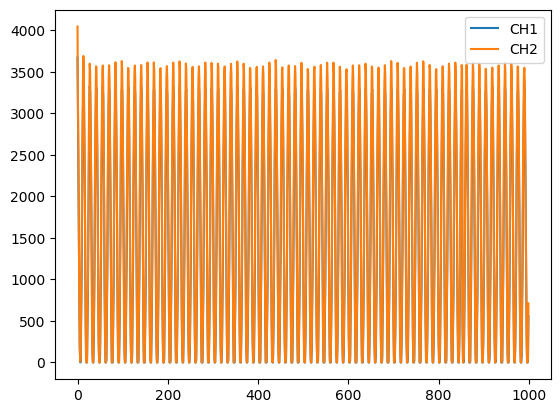

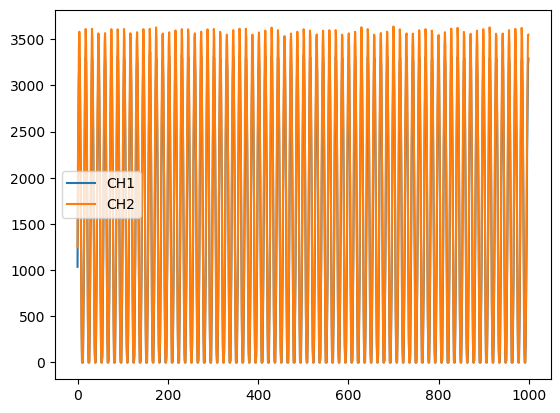

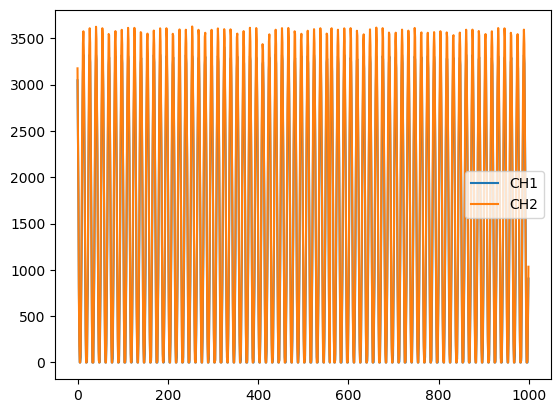

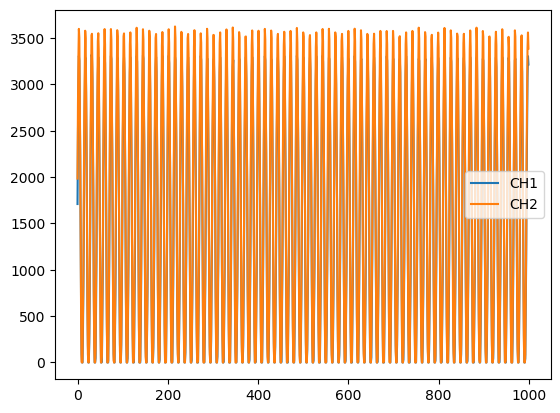

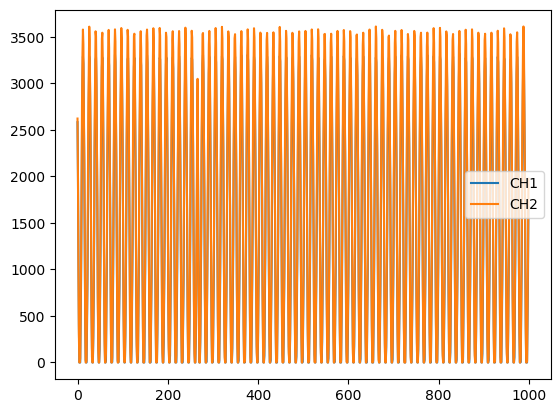

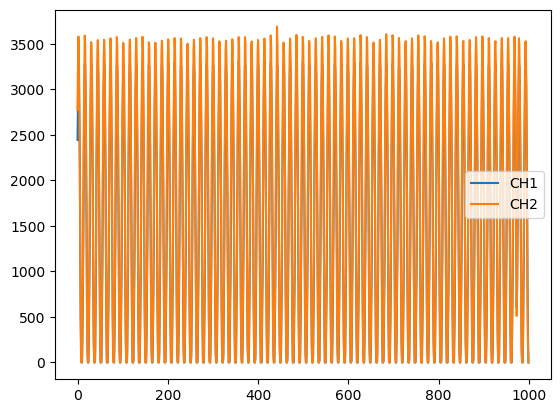

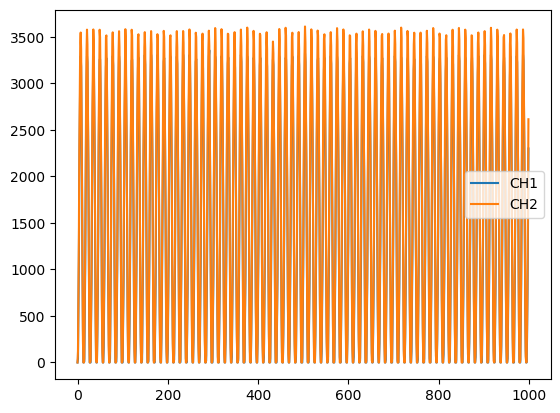

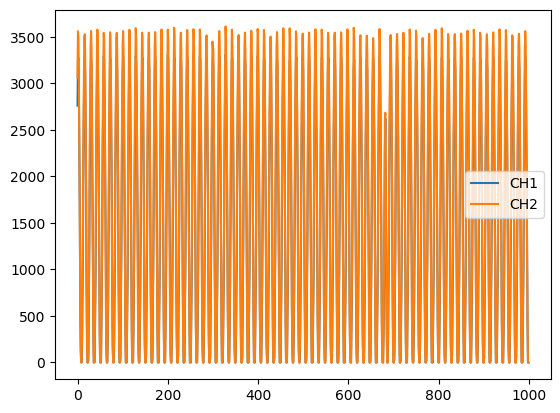

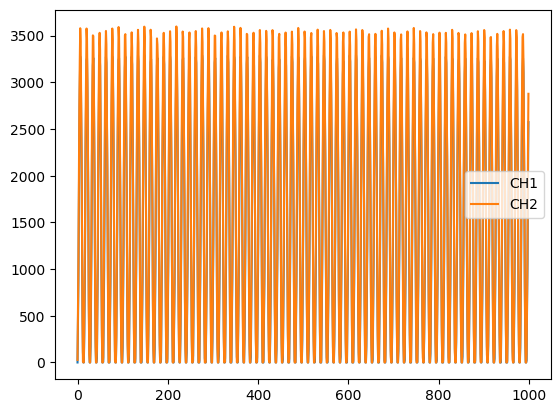

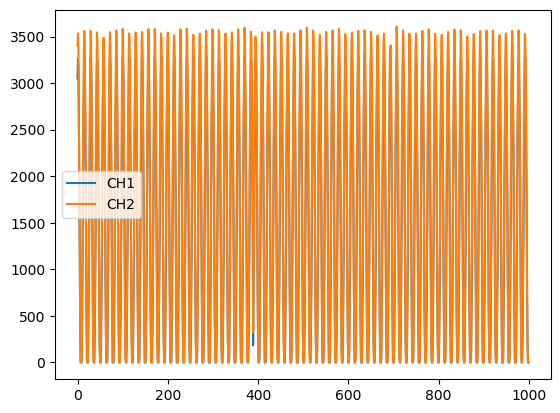

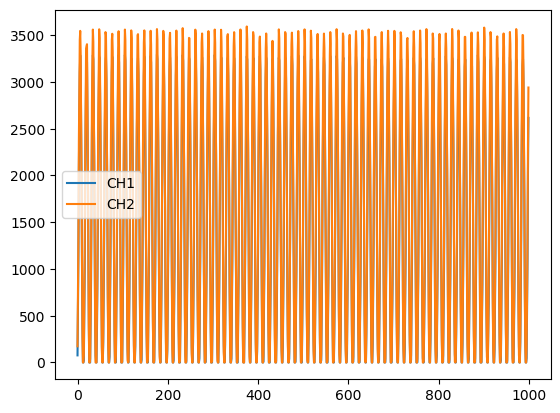

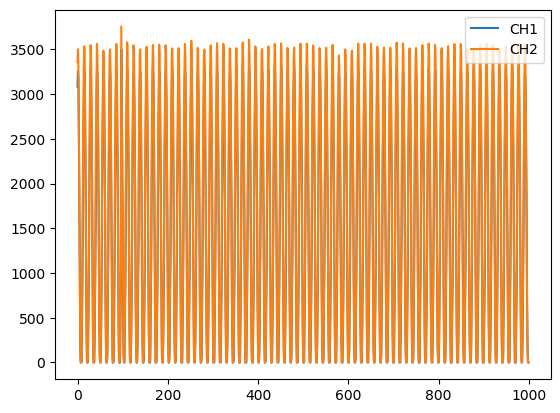

In [2]:
import serial
import matplotlib.pyplot as plt
import numpy as np

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def plot_data(data):
    plt.figure()
    plt.plot(data[0], label="CH1")
    plt.plot(data[1], label="CH2")
    plt.legend()
    plt.show()

data_buffer = [[], []]

while True:
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:  # Once we have 1000 samples, plot the data.
        plot_data(data_buffer)
        data_buffer = [[], []]  # Clear the buffer.


KeyboardInterrupt: 

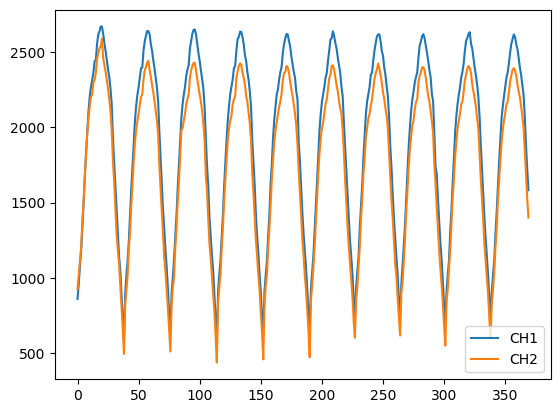

In [1]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def plot_data(data):
    plt.figure()
    plt.plot(data[0], label="CH1")
    plt.plot(data[1], label="CH2")
    plt.legend()
    plt.show()

data_buffer = [[], []]

plt.ion()  # Turn on interactive mode for live plotting

while True:
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:  # Once we have 1000 samples, plot the data.
        plot_data(data_buffer)
        data_buffer = [[], []]  # Clear the buffer.
        
    # Clear the current plot
    display.clear_output(wait=True)
    
    # Plot the data
    plt.plot(data_buffer[0], label="CH1")
    plt.plot(data_buffer[1], label="CH2")
    plt.legend()
    
    # Redraw the plot
    display.display(plt.gcf())
    plt.pause(0.01)


In [6]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def plot_data(data):
    plt.figure()
    plt.plot(data[0], label="CH1")
    plt.plot(data[1], label="CH2")
    plt.legend()
    plt.show()

data_buffer = [[], []]

plt.ion()  # Turn on interactive mode for live plotting

while True:
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:  # Once we have 1000 samples, plot the data.
        plot_data(data_buffer)
        data_buffer = [[], []]  # Clear the buffer.
        
    # Clear the current plot
    display.clear_output(wait=True)
    
    # Plot the data
    plt.plot(data_buffer[0], label="CH1")
    plt.plot(data_buffer[1], label="CH2")
    plt.legend()
    
    # Redraw the plot
    display.display(plt.gcf())
    plt.pause(0.01)


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

In [3]:
import serial
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# シリアル通信の設定
ser = serial.Serial('COM5', 115200)

# データの格納用
data1 = []
data2 = []

# データの読み取りとプロットの更新
def update(frame):
    # シリアル通信でデータを読み取る
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(',')))

    # データを追加
    data1.append(values[0])
    data2.append(values[1])

    # プロットを更新
    plt.cla()
    plt.plot(data1, label='CH1')
    plt.plot(data2, label='CH2')
    plt.legend()

# アニメーションの作成
ani = FuncAnimation(plt.gcf(), update, interval=100)

# プロットの表示
plt.show()


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

In [5]:
import serial
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# シリアル通信の設定
ser = serial.Serial('COM5', 115200)

# データの格納用
data1 = []
data2 = []

# データの読み取りとプロットの更新
def update(frame):
    # シリアル通信でデータを読み取る
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(',')))

    # データを追加
    data1.append(values[0])
    data2.append(values[1])

    # プロットを更新
    plt.cla()
    plt.plot(data1, label='CH1')
    plt.plot(data2, label='CH2')
    plt.legend()

# アニメーションの作成
ani = FuncAnimation(plt.gcf(), update, interval=100)

# プロットの表示
plt.show()


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

In [2]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def plot_data(data):
    plt.figure()
    plt.plot(data[0], label="CH1")
    plt.plot(data[1], label="CH2")
    plt.legend()
    plt.show()

data_buffer = [[], []]

plt.ion()  # Turn on interactive mode for live plotting

while True:
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:  # Once we have 1000 samples, plot the data.
        plot_data(data_buffer)
        data_buffer = [[], []]  # Clear the buffer.
        
    # Clear the current plot
    display.clear_output(wait=True)
    
    # Plot the data
    plt.plot(data_buffer[0], label="CH1")
    plt.plot(data_buffer[1], label="CH2")
    plt.legend()
    
    # Redraw the plot
    display.display(plt.gcf())
    plt.pause(0.01)


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

In [4]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def plot_data(data):
    plt.figure()
    plt.plot(data[0], label="CH1")
    plt.plot(data[1], label="CH2")
    plt.legend()
    plt.show()

data_buffer = [[], []]

plt.ion()  # Turn on interactive mode for live plotting

while True:
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:  # Once we have 1000 samples, plot the data.
        plot_data(data_buffer)
        data_buffer = [[], []]  # Clear the buffer.
        
    # Clear the current plot
    display.clear_output(wait=True)
    
    # Plot the data
    plt.plot(data_buffer[0], label="CH1")
    plt.plot(data_buffer[1], label="CH2")
    plt.legend()
    
    # Redraw the plot
    display.display(plt.gcf())
    plt.pause(0.01)


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

In [5]:
import serial
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def plot_data(data):
    plt.figure()
    plt.plot(data[0], label="CH1")
    plt.plot(data[1], label="CH2")
    plt.legend()
    plt.show()

data_buffer = [[], []]

plt.ion()  # Turn on interactive mode for live plotting

while True:
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:  # Once we have 1000 samples, plot the data.
        plot_data(data_buffer)
        data_buffer = [[], []]  # Clear the buffer.
        
    # Clear the current plot
    display.clear_output(wait=True)
    
    # Plot the data
    plt.plot(data_buffer[0], label="CH1")
    plt.plot(data_buffer[1], label="CH2")
    plt.legend()
    
    # Redraw the plot
    display.display(plt.gcf())
    plt.pause(0.01)


SerialException: could not open port 'COM5': PermissionError(13, 'アクセスが拒否されました。', None, 5)

In [1]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import serial
import numpy as np

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def update_plot():
    global data_buffer
    data = read_from_serial()
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    if len(data_buffer[0]) >= 1000:
        ax1.clear()
        ax2.clear()
        ax1.plot(data_buffer[0], label="CH1")
        ax2.plot(data_buffer[1], label="CH2")
        ax1.legend()
        ax2.legend()
        canvas.draw()
        data_buffer = [[], []]
    root.after(1, update_plot)

# GUI setup
root = tk.Tk()
root.title("Simple Oscilloscope")

frame = ttk.Frame(root, padding="5")
frame.grid()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas.get_tk_widget().grid(row=0, column=0)

# Initialize data buffer
data_buffer = [[], []]

# Update plot periodically
root.after(1, update_plot)

root.mainloop()


SerialException: could not open port 'COM5': FileNotFoundError(2, '指定されたファイルが見つかりません。', None, 2)

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import serial
import numpy as np

ser = serial.Serial('COM5', 115200)

def read_from_serial():
    line = ser.readline().decode('utf-8').rstrip()
    values = list(map(int, line.split(",")))
    return values

def update_plot():
    global data_buffer
    data = read_from_serial()
    
    # Trigger condition: signal1 crosses a threshold (e.g., 600)
    if data[0] >= 600:
        # Empty the buffer when the trigger condition is met
        data_buffer = [[], []]
        
    # Append new data
    data_buffer[0].append(data[0])
    data_buffer[1].append(data[1])
    
    if len(data_buffer[0]) >= 1000:
        ax1.clear()
        ax2.clear()
        ax1.plot(data_buffer[0], label="CH1")
        ax2.plot(data_buffer[1], label="CH2")
        ax1.legend()
        ax2.legend()
        canvas.draw()
        # Keep the buffer, but remove the oldest element to make room for a new one
        data_buffer[0].pop(0)
        data_buffer[1].pop(0)
        
    root.after(1, update_plot)

# GUI setup
root = tk.Tk()
root.title("Simple Oscilloscope")

frame = ttk.Frame(root, padding="5")
frame.grid()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas.get_tk_widget().grid(row=0, column=0)

# Initialize data buffer
data_buffer = [[], []]

# Update plot periodically
root.after(1, update_plot)

root.mainloop()
